#### Домашнее задание к модулю 12
В качестве домашнего задания вам предлагается создать нейронную сеть с помощью механизмов Keras, которая будет классифицировать товары из датасета fasion_mnist.

В отличие от предыдущего задания вам предлагается создать сверточную нейросеть, использующую VGG16 в качестве сверточной основы.

Обучите полученную сеть на данных из датасета fasion_mnist. Попытайтесь добиться максимально возможной точности классификации за счет манипуляции параметрами сети. Во время время обучения используйте приемы дообучения и выделения признаков.

Сравните точность полученной сверточной сети с точностью многослойной сети из предыдущего задания. Сделайте выводы.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, losses

for dirname, _, filenames in os.walk('/content/drive/MyDrive/data_science/fashion_mnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/data_science/fashion_mnist/fashion-mnist_test.csv
/content/drive/MyDrive/data_science/fashion_mnist/fashion-mnist_train.csv
/content/drive/MyDrive/data_science/fashion_mnist/t10k-images-idx3-ubyte
/content/drive/MyDrive/data_science/fashion_mnist/t10k-labels-idx1-ubyte
/content/drive/MyDrive/data_science/fashion_mnist/train-images-idx3-ubyte
/content/drive/MyDrive/data_science/fashion_mnist/train-labels-idx1-ubyte
/content/drive/MyDrive/data_science/fashion_mnist/models/vgg16_base_model.hdf5


In [3]:
train_images = pd.read_csv('/content/drive/MyDrive/data_science/fashion_mnist/fashion-mnist_train.csv')
test_images = pd.read_csv('/content/drive/MyDrive/data_science/fashion_mnist/fashion-mnist_test.csv')

In [4]:
train_labels = train_images['label']
train_images = train_images.drop('label',axis = 1)
test_labels = test_images['label']
test_images = test_images.drop('label',axis = 1)

In [5]:
train_images = np.dstack([train_images]*3)
train_images = train_images.reshape(-1,28,28,3)
train_images = np.asarray([keras.preprocessing.image.img_to_array(keras.preprocessing.image.array_to_img(im, scale=False).resize((48,48))) for im in train_images])
train_images = train_images.astype("float32") / 255

test_images = np.dstack([test_images]*3)
test_images = test_images.reshape(-1,28,28,3)
test_images = np.asarray([keras.preprocessing.image.img_to_array(keras.preprocessing.image.array_to_img(im, scale=False).resize((48,48))) for im in test_images])
test_images = test_images.astype("float32") / 255

print(train_images.shape, test_images.shape)

(60000, 48, 48, 3) (10000, 48, 48, 3)


In [6]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
print(train_labels.shape, test_labels.shape)

(60000, 10) (10000, 10)


In [7]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False 

model = Sequential([
   conv_base,
   Flatten(),
   Dense(512, activation="relu"),
   Dense(256, activation="relu"),
   Dropout(0.5),
   Dense(128, activation="relu"),
  #  Dropout(0.3),
   Dense(10, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=["accuracy"]
)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode="nearest"
# )
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     train_dir, 
#     target_size=(150, 150),
#     batch_size=20,
#     class_mode="binary"
# )

# train_generator = train_datagen.flow(
#     train_images, 
#     train_labels,
#     batch_size=32,
# )

# validation_generator = test_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(150, 150),
#     batch_size=20,
#     class_mode="binary"
# )

# validation_generator = test_datagen.flow(
#     train_images, 
#     train_labels,  
#     batch_size=8
# )

In [9]:
history = model.fit(
    train_images[30000:], 
    train_labels[30000:],
    batch_size=48,
    epochs=20,
    validation_data=(train_images[:30000], train_labels[:30000])
)

Epoch 1/20
625/625 [==============================] - 30s 34ms/step - loss: 0.3605 - accuracy: 0.2610 - val_loss: 0.2247 - val_accuracy: 0.6561
Epoch 2/20
625/625 [==============================] - 18s 29ms/step - loss: 0.2120 - accuracy: 0.5724 - val_loss: 0.1589 - val_accuracy: 0.7439
Epoch 3/20
625/625 [==============================] - 20s 32ms/step - loss: 0.1648 - accuracy: 0.6858 - val_loss: 0.1305 - val_accuracy: 0.7619
Epoch 4/20
625/625 [==============================] - 20s 32ms/step - loss: 0.1406 - accuracy: 0.7332 - val_loss: 0.1159 - val_accuracy: 0.7794
Epoch 5/20
625/625 [==============================] - 20s 32ms/step - loss: 0.1272 - accuracy: 0.7554 - val_loss: 0.1072 - val_accuracy: 0.7914
Epoch 6/20
625/625 [==============================] - 20s 31ms/step - loss: 0.1179 - accuracy: 0.7695 - val_loss: 0.1014 - val_accuracy: 0.7994
Epoch 7/20
625/625 [==============================] - 21s 34ms/step - loss: 0.1108 - accuracy: 0.7867 - val_loss: 0.0968 - val_accuracy:

In [10]:
loss_test, acc_test = model.evaluate(test_images, test_labels)
print(f'Loss Test: {loss_test}, Accuracy Test: {acc_test}')

313/313 [==============================] - 5s 13ms/step - loss: 0.0736 - accuracy: 0.8481
Loss Test: 0.07363678514957428, Accuracy Test: 0.8481000065803528


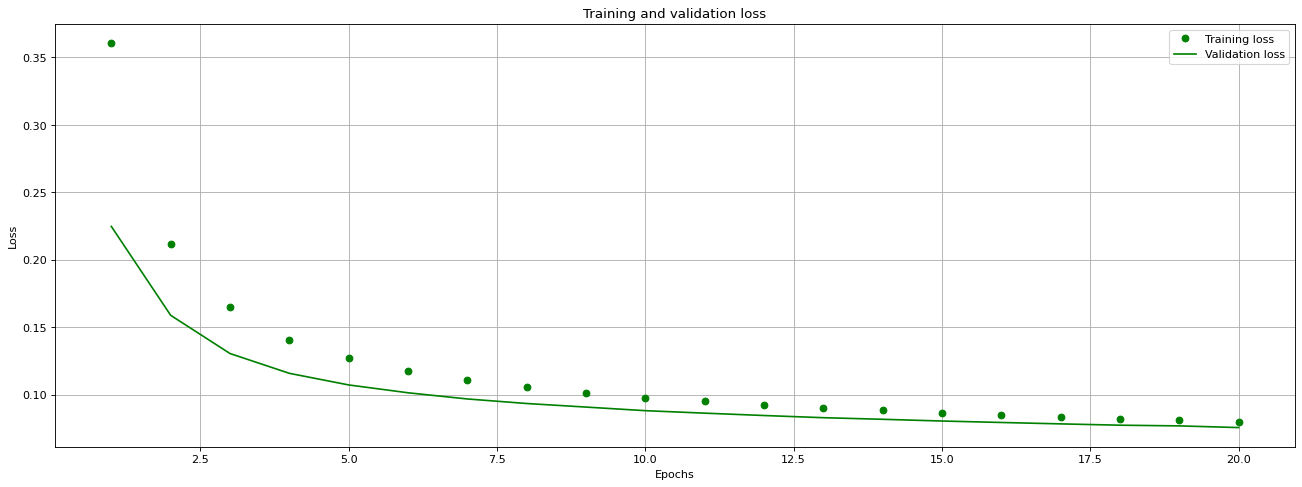

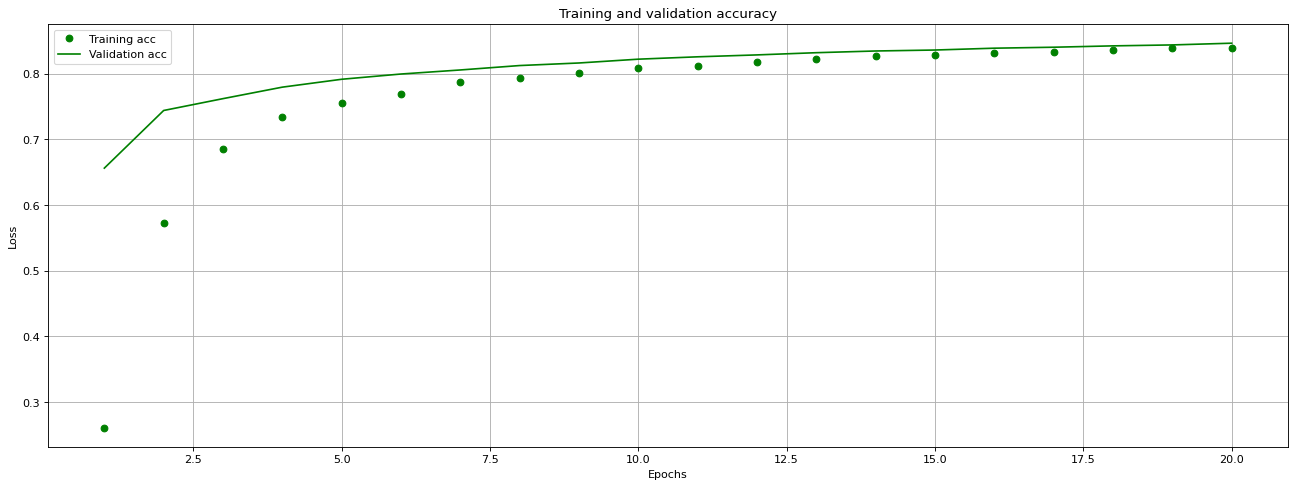

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.figure(figsize=(20, 7), dpi=80)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(20, 7), dpi=80)
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [12]:
model.save("/content/drive/MyDrive/data_science/fashion_mnist/models/vgg16_base_model.h5")

### Fine-tuning

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [14]:
trainable_layers = ['block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']

conv_base.trainable = True

for layer in conv_base.layers:
    if layer.name not in trainable_layers:
        layer.trainable = False

modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=1e-5),
    metrics=["acc"]
)

In [15]:
history = model.fit(
    train_images, 
    train_labels,
    batch_size=48,
    epochs=20,
    validation_split=0.2,
    validation_data=(train_images, train_labels)
)

loss_test, acc_test = model.evaluate(test_images, test_labels)
print(f'Loss Test: {loss_test}, Accuracy Test: {acc_test}')

Epoch 1/20
1250/1250 [==============================] - 57s 43ms/step - loss: 0.0649 - acc: 0.8727 - val_loss: 0.0493 - val_acc: 0.9023
Epoch 2/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.0514 - acc: 0.9009 - val_loss: 0.0474 - val_acc: 0.9066
Epoch 3/20
1250/1250 [==============================] - 53s 43ms/step - loss: 0.0451 - acc: 0.9130 - val_loss: 0.0406 - val_acc: 0.9187
Epoch 4/20
1250/1250 [==============================] - 48s 38ms/step - loss: 0.0407 - acc: 0.9224 - val_loss: 0.0361 - val_acc: 0.9282
Epoch 5/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.0377 - acc: 0.9281 - val_loss: 0.0316 - val_acc: 0.9386
Epoch 6/20
1250/1250 [==============================] - 48s 38ms/step - loss: 0.0345 - acc: 0.9338 - val_loss: 0.0282 - val_acc: 0.9463
Epoch 7/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.0322 - acc: 0.9392 - val_loss: 0.0271 - val_acc: 0.9487
Epoch 8/20
1250/1250 [==========================

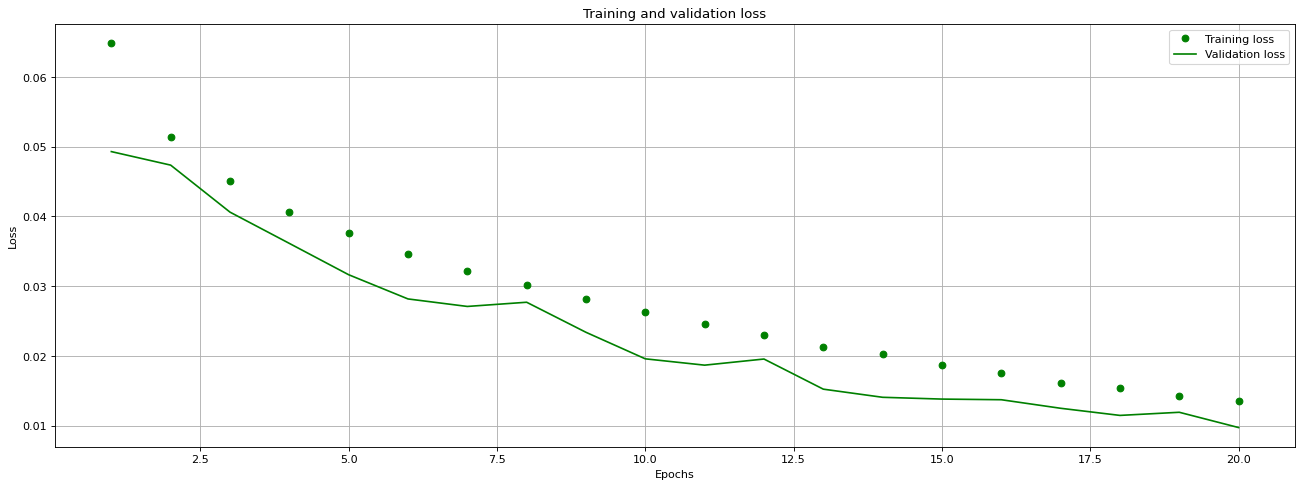

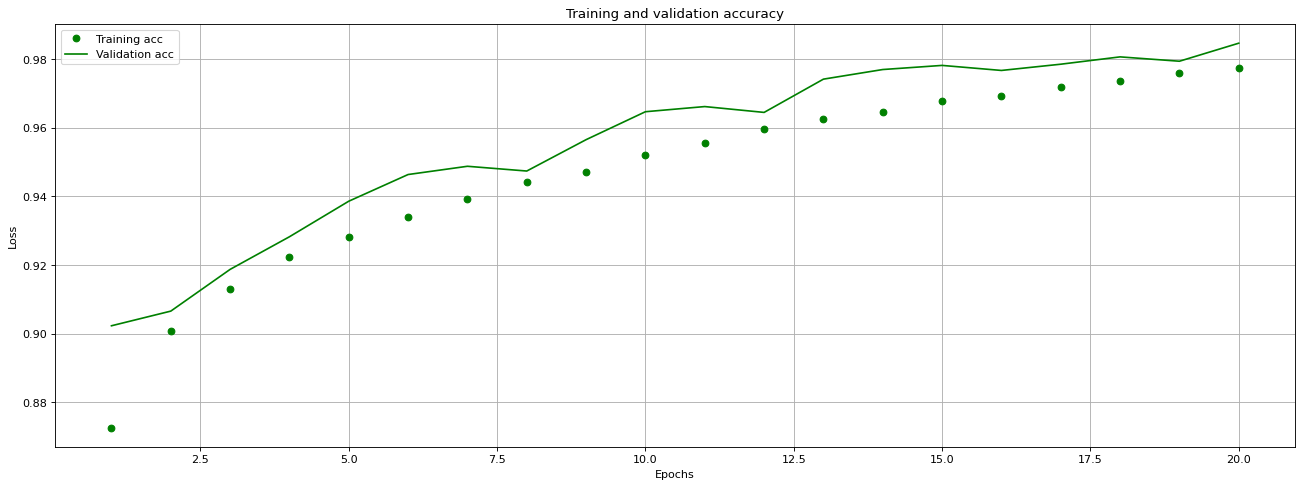

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc'])+1)

plt.figure(figsize=(20, 7), dpi=80)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(20, 7), dpi=80)
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [17]:
model.save("/content/drive/MyDrive/data_science/fashion_mnist/models/vgg16_base_model_2.h5")
